In [1]:
import pandas as pd
from finn_jo_jo import *
df = read_stations()

In [2]:
pivot = to_pivot(df)

In [3]:
df_weather = load_weather("rostock")
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2016-01-01 to 2020-12-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rainfall  1827 non-null   float64
 1   avg_temp  1827 non-null   float64
dtypes: float64(2)
memory usage: 42.8 KB


In [4]:
rst = pivot['Rostock'].drop([11, 12], 1)
rst = berufsverkehr(rst)
rst = covid(rst)
rst = rst.groupby(rst.index.date).sum()


rst = rst.join(df_weather)
rst

,1,2,3,4,5,6,7,8,9,10,rainfall,avg_temp
2016-01-01,10.0,14.0,3.0,28.0,5.0,31.0,28.0,0.0,0.0,0.0,0.0,1.4
2016-01-04,31.0,84.0,0.0,270.0,146.0,34.0,333.0,0.0,0.0,0.0,0.0,-8.9
2016-01-05,41.0,86.0,0.0,248.0,142.0,33.0,336.0,0.0,0.0,0.0,0.0,-8.1
2016-01-06,47.0,100.0,0.0,265.0,144.0,31.0,633.0,0.0,0.0,0.0,0.0,-6.9
2016-01-07,57.0,93.0,0.0,262.0,136.0,41.0,354.0,0.0,0.0,0.0,4.8,-6.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,8.0,9.0,8.0,38.0,11.0,21.0,18.0,1.0,1.0,0.0,0.6,5.7
2019-12-26,10.0,11.0,9.0,40.0,13.0,54.0,27.0,2.0,2.0,0.0,0.2,5.6
2019-12-27,31.0,63.0,109.0,182.0,114.0,48.0,83.0,3.0,3.0,0.0,0.6,3.3
2019-12-30,35.0,67.0,140.0,192.0,94.0,78.0,94.0,3.0,9.0,7.0,0.0,7.2


In [5]:

import warnings
warnings.filterwarnings('ignore')

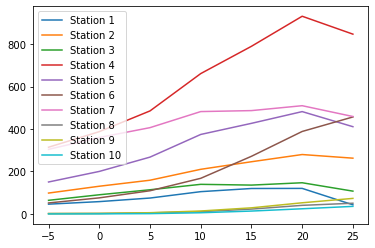

In [6]:
for station_id in range(1, 11):
    bed_temps = []
    
    for temp in range (-5,31,5):
        bed_temps.append(bedingte_erwartung(rst[station_id], rst['avg_temp'], temp, temp+5))

    plt.plot(np.linspace(-5,30,8), bed_temps, label = 'Station '+str(station_id))

plt.legend()
plt.show()

In [12]:
def create_plot(df,label_bedingung,range_bedingung, step_size_bed,label_data,stations):
    for station in stations:
        e_x = []
        for temp in range(range_bedingung[0],range_bedingung[1],step_size_bed):
            e_x.append(bedingte_erwartung(df[station],df[label_bedingung],temp, temp+step_size_bed))
        plt.plot(np.linspace(range_bedingung[0],range_bedingung[1],
                             int((range_bedingung[1]-range_bedingung[0])/step_size_bed)),e_x,label = label_data+str(station))
    plt.legend()
    plt.show()

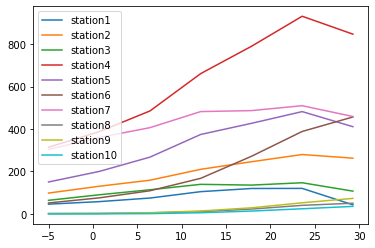

In [13]:
create_plot(rst,'avg_temp',(-5,35),5,'station',range(1,11))

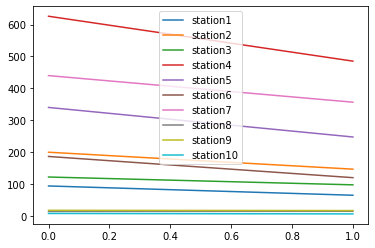

In [20]:
for station_id in range(1, 11):
    bed_temps = []
    bed_temps.append(bedingte_erwartung(rst[station_id], rst['rainfall'], -1, 1))
    bed_temps.append(bedingte_erwartung(rst[station_id], rst['rainfall'], 20,2000))
    plt.plot(bed_temps,label = 'station'+str(station_id))
plt.legend()
plt.show()

In [122]:
bedingte_erwartung(rst[4], rst['rainfall'], 0, 65536)

1826.3165548098432

In [121]:
bedingte_erwartung(rst[4], rst['rainfall'], (-1, 1),)

2511.345532831001